## Machine Learning Prediction

#### Objectives:


Perform exploratory data analysis and determine training labels:
* Create a column for the class
* Standardize the data
* Split into training data and test data
* Find best hyper parameters for SVM, Classification Trees and Logistic Regression
* Find the best performing method uding test data

#### Import Liraries and Define Auxiliary Functions

In [ ]:
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Function to plot confusion matrix

def plot_confusion_matrix(y, y_predict):
  '''
  This funcion plots confusion matrix
  '''
  from sklearn.metrics import confusion_matrix

  cm = confusion_matrix(y, y_predict)
  ax = plt.subplot()
  sns.heatmap(cm, annot = True, ax = ax) # annot = True to annotate cells
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(['did not land', 'land'])
  ax.yaxis.set_ticklabels(['did not land', 'land'])
  plt.show()

#### Load the dataframe

In [ ]:
# from js import fetch
# import io

# URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp1 = await fetch(URL1)
# text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
# data = pd.read_csv(text1)

In [ ]:
url1 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
data = pd.read_csv(url1)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
# URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
# resp2 = await fetch(URL2)
# text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
# X = pd.read_csv(text2)

In [ ]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(url2)
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Preprocessing the Data

#### Task 1

In [ ]:
# Create a numpy array from the column 'Class' in data by applying the method to_numpy() and then assign it to variable Y

Y = data['Class'].to_numpy()
Y[:5]

array([0, 0, 0, 0, 0])

#### Task 2

In [ ]:
# Standardize the data in X and the reassign it to the variable X

X = preprocessing.StandardScaler().fit_transform(X)
X[:1]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

#### Task 3

In [ ]:
# Use the function train_test_split() to split the data X and Y into training and testing set.
# Set test_size to 0.2 and random_state to 2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
Y_test.shape

(18,)

In [ ]:
X_test.shape

(18, 83)

### Logistic Regression

#### Task 4

In [ ]:
# Create a logistic regression object then create a GridSearchCV object 'logreg_cv' with cv = 10.
# Fit the object to find the best parameters from the dictionary parameters.

parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

In [ ]:
logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, parameters, cv = 10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [ ]:
print('Tuned parameters: {}'.format(logreg_cv.best_params_))
print('Accuracy: {}'.format(logreg_cv.best_score_))

Tuned parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713


#### Task 5

In [ ]:
# Calculate the accuracy on the test data using the method score

print('Accuracy on the test data: {}'.format(logreg_cv.score(X_test, Y_test)))

Accuracy on the test data: 0.8333333333333334


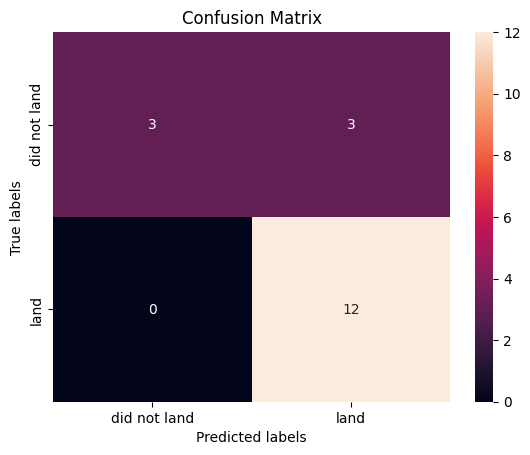

In [ ]:
# Plotting the confusion matrix

yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [ ]:
# As can be seen from the confusion matrix, the model is doing a good job in predicting the positive labels (i.e., successful landing).
# Area of concern is predicting the negative labels (i.e., failed landing) where we have high percentage of false positives.

### Support Vector Machine

#### Task 6

In [ ]:
# Create a support vector machine object then create a GridSearchCV object 'svm_cv' with cv = 10.
# Fit the onject and find the best parameters from the dictionary parameters.

parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}

svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv = 10)

svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [ ]:
print('Tuned hyper parameters: {}'.format(svm_cv.best_params_))
print('Accuracy: {}'.format(svm_cv.best_score_))

Tuned hyper parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


#### Task 7

In [ ]:
# Calculate the accuracy on the test data

print('Accuracy score on test data: {}'.format(svm_cv.score(X_test, Y_test)))

Accuracy score on test data: 0.8333333333333334


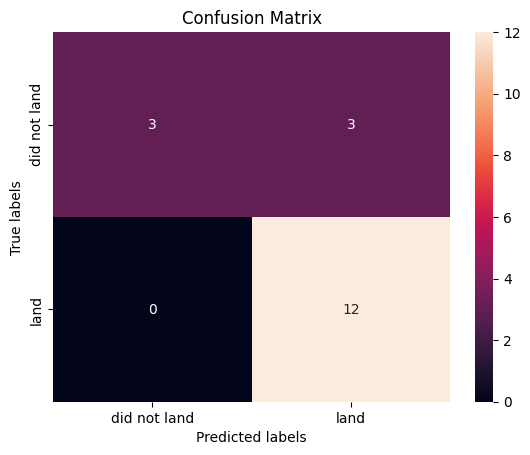

In [ ]:
# Plotting the confusion matrix

yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [ ]:
# As can be seen from the confusion matrix, the model is doing a good job in predicting the positive labels (i.e., successful landing).
# Area of concern is predicting the negative labels (i.e., failed landing) where we have high percentage of false positives.
# Results are similar to what we got from Logistic Regression model.

### Decision Tree Classifier

#### Task 8

In [ ]:
# Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10.
# Fit the object to find the best parameters from the dictionary 'parameters'.

parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1, 10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]
              }

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv = 10)

tree_cv.fit(X_train, Y_train)

In [ ]:
print('Tuned hyper parameters: {}'.format(tree_cv.best_params_))
print('Accuracy: {}'.format(tree_cv.best_score_))

Tuned hyper parameters: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy: 0.9160714285714286


#### Task 9

In [ ]:
print('Accuracy score on test data: {}'.format(tree_cv.score(X_test, Y_test)))

Accuracy score on test data: 0.8888888888888888


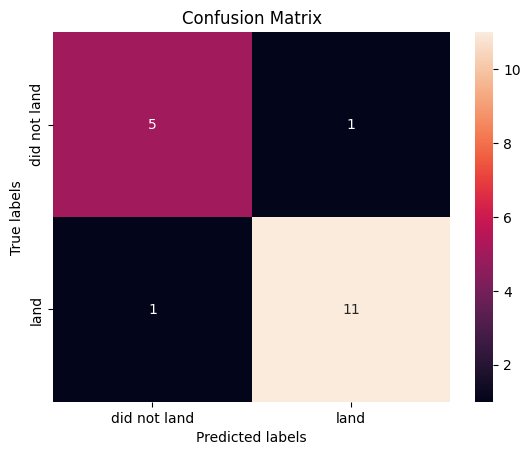

In [ ]:
# Plotting the confusion matrix

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [ ]:
# As can be seen from the confusion matrix, the model predicts the cases of successful landings with high accuracy (only 1 false negative for 12 actual positive labes)
# The model predicts the cases of failed landings with good accuracy (1 false positive for 6 actual negative labels)
# Results are better than what we got from Logistic regression and SVM.

### k-Nearest Neighbours

#### Task 10

In [ ]:
# Create a k-nearest neighbor object then create a GridSearchCV object knn_cv with cv = 10.
# Fit the object to find the best parameters from the dictionary 'parameters'.

parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'bail_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv = 10)

knn_cv.fit(X_train, Y_train)

In [ ]:
print('Tuned hyper parameters: {}'.format(knn_cv.best_params_))
print('Accuracy: {}'.format(knn_cv.best_score_))

Tuned hyper parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858


#### Task 11

In [ ]:
print('Accuracy score on test data: {}'.format(knn_cv.score(X_test, Y_test)))

Accuracy score on test data: 0.8333333333333334


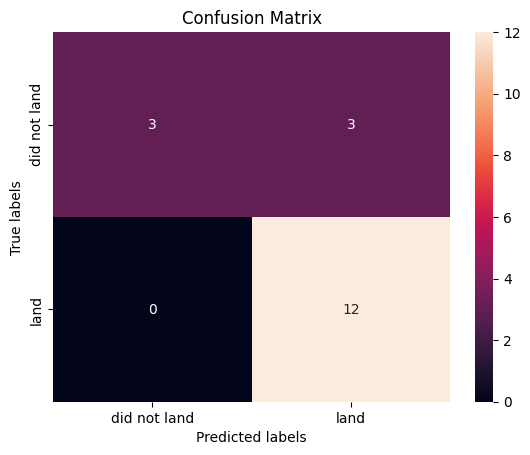

In [ ]:
# Plotting the confusion matrix

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [ ]:
# As can be seen from the confusion matrix, the model is doing a good job in predicting the positive labels (i.e., successful landing).
# Area of concern is predicting the negative labels (i.e., failed landing) where we have high percentage of false positives.
# Results are similar to what we got from Logistic regression and SVM.

### Best Model

#### Task 12

In [ ]:
# The Decision Tree model has the highest accuracy score on both the training data and the testing data,
# Also, the model is performing better than rest of the three models in making predictions.